In [1]:
#Loading rho, N and relaxation time from saved data
import pandas as pd
import numpy as np

# Load the Excel file
df2 = pd.read_excel('relaxation_time_data.xlsx')

# Get distinct N and rho values
N_array = np.sort(df2['N'].unique())  # Unique values of N, sorted
rho_array = np.sort(df2['Density'].unique())  # Unique values of Density (rho), sorted

# Initialize the relaxation_times matrix with zeros
relaxation_times = np.zeros((len(N_array), len(rho_array)))

# Populate the relaxation_times matrix
for i, N in enumerate(N_array):
    for j, rho in enumerate(rho_array):
        # Find the relaxation time for this N and rho, if it exists
        matching_row = df2[(df2['N'] == N) & (df2['Density'] == rho)]
        if not matching_row.empty:
            relaxation_times[i, j] = matching_row['Relax_time'].values[0]  # Store the relaxation time


In [4]:
print(N_array[:4])

[  50  100  500 1000]


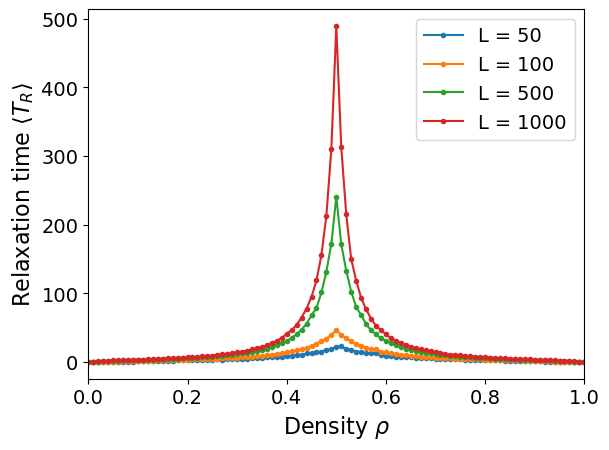

In [7]:
# Plotting the relaxation times
import matplotlib.pyplot as plt

# Plotting the data
for i, N in enumerate(N_array[:4]):
    plt.plot(rho_array, relaxation_times[i, :], label=f'L = {N}', marker='.')

# Customizing the plot
plt.xlabel(r'Density $\rho$', fontsize=16)  # LaTeX-style x-axis label with larger font
plt.ylabel(r'Relaxation time $\langle T_R \rangle$', fontsize=16)  # LaTeX-style y-axis label with larger font
plt.xlim(0, 1)  # Set x-axis limits
plt.xticks(fontsize=14)  # Bigger font size for x-axis ticks
plt.yticks(fontsize=14)  # Bigger font size for y-axis ticks
plt.legend(fontsize=14, frameon=True)  # Bigger font size for the legend
plt.show()  # No grid (default behavior)


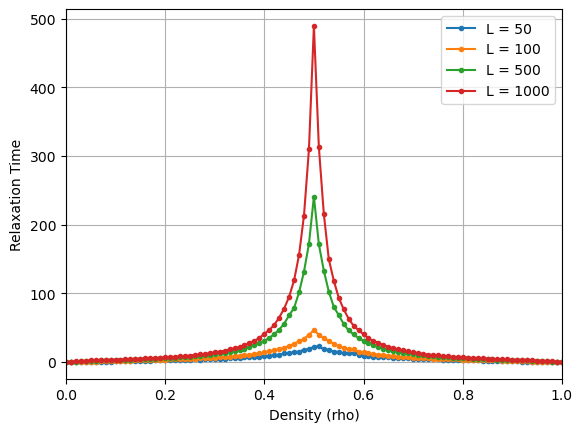

In [5]:
#plotting the relaxation times
import matplotlib.pyplot as plt
for i, N in enumerate(N_array[:4]):
    plt.plot(rho_array, relaxation_times[i, :], label=f'L = {N}', marker='.')

plt.xlabel('Density (rho)')
plt.ylabel('Relaxation Time')
#plt.title('Relaxation Time vs Density for different N values')
plt.xlim(0,1)
plt.legend()
plt.grid(True)
plt.show()

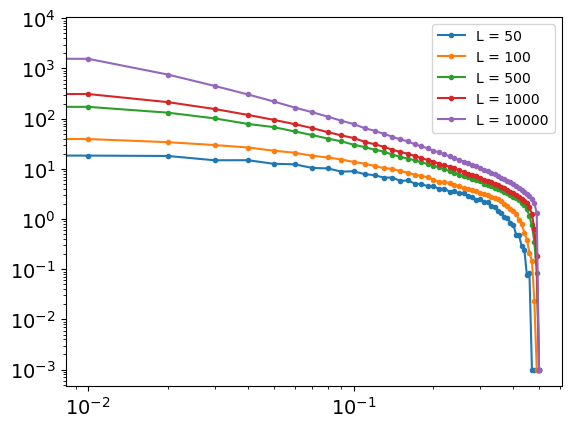

In [9]:
#fancy code for paper - 

import matplotlib.pyplot as plt

# Plotting the data
for i, N in enumerate(N_array):
    plt.loglog(0.5 - rho_array[0:len(rho_array)], relaxation_times[i, 0:len(rho_array)], label=f'L = {N}', marker='.')

# Customizing the plot
plt.xticks(fontsize=14)  # Bigger font size for x-axis ticks
plt.yticks(fontsize=14)  # Bigger font size for y-axis ticks
plt.legend()
plt.show()  # No grid (default behavior)


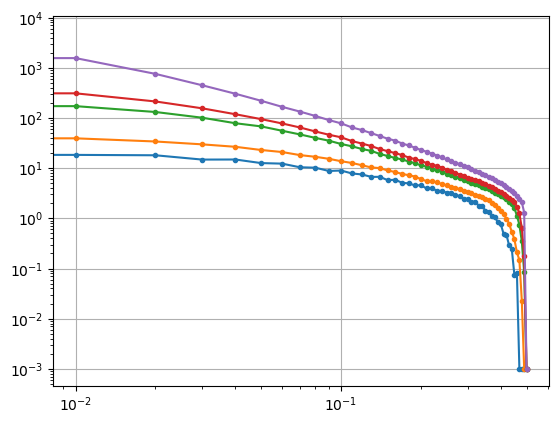

In [3]:
import matplotlib.pyplot as plt

for i, N in enumerate(N_array):
    plt.loglog(0.5 - rho_array[0:len(rho_array)], relaxation_times[i, 0:len(rho_array)], label=f'L = {N}', marker='.')
#plt.xlabel('Density (0.5 - rho)')
#plt.ylabel('Relaxation Time')
#plt.title('Relaxation Time vs Density for different N values')
#plt.legend()
plt.grid(True)
plt.show()

C:\Users\aryam\AppData\Local\Temp\ipykernel_33844\333997102.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-paper')


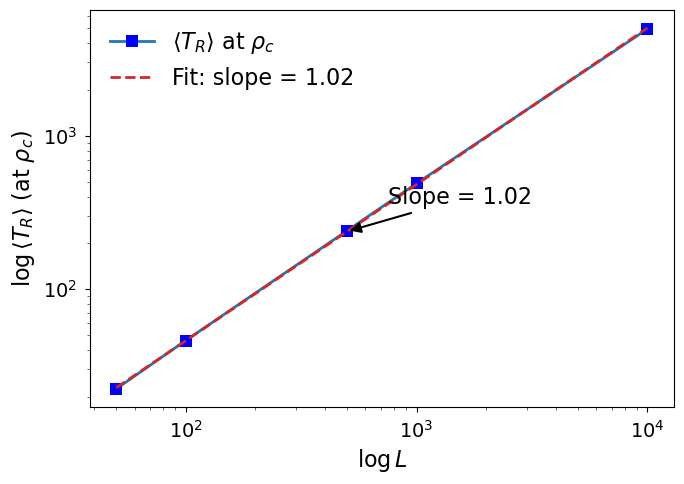

Slope = 1.02


In [22]:
#fancy code for paper - 

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Set the plotting style for a professional look
plt.style.use('seaborn-paper')
plt.rcParams.update({
    'font.size': 12,  # Base font size
    'legend.fontsize': 14,  # Bigger legend font size
    'lines.markersize': 8,  # Marker size
    'lines.linewidth': 2,  # Line width
})

# Extract relaxation times at rho_c
rho_c_index = int((len(rho_array) - 1) / 2)
relaxation_at_rho_c = relaxation_times[:, rho_c_index]

# Log-log plot of relaxation times at rho_c
fig, ax = plt.subplots(figsize=(7, 5))
ax.loglog(N_array, relaxation_at_rho_c, marker='s', mfc='blue', linestyle='-', color='tab:blue', label=r'$\langle T_R \rangle$ at $\rho_c$')

# Perform linear regression in log-log space
log_N_array = np.log10(N_array)
log_relaxation_at_rho_c = np.log10(relaxation_at_rho_c)
result = linregress(log_N_array, log_relaxation_at_rho_c)
slope, std_err = result.slope, result.stderr

# Plot the fitted line
ax.loglog(N_array, 10**(result.intercept) * N_array**slope, linestyle='--', color='tab:red', label=f'Fit: slope = {slope:.2f} ')

# Customize axes labels
ax.set_xlabel(r'$\log L$', fontsize=16)  # Larger font size for x-axis label
ax.set_ylabel(r'$\log \langle T_R \rangle$ (at $\rho_c$)', fontsize=16)  # Larger font size for y-axis label

# Customize axes ticks
ax.tick_params(axis='both', which='major', labelsize=14)  # Larger tick font size

# Customize legend
ax.legend(loc='best', frameon=False, fontsize=16)  # Bigger font size for the legend

# Annotate the slope on the plot with a thicker arrow
text_x = N_array[int(len(N_array) / 2)]
text_y = 10**(result.intercept) * text_x**slope
ax.annotate(f'Slope = {slope:.2f} ', xy=(text_x, text_y), xytext=(text_x * 1.5, text_y * 1.5),
            arrowprops=dict(facecolor='black', arrowstyle='-|>', linewidth=1.5), fontsize=16)  # Thicker arrow and bigger font size

# Show the plot
plt.tight_layout()
plt.show()

# Print the slope and error
print(f"Slope = {slope:.2f}")


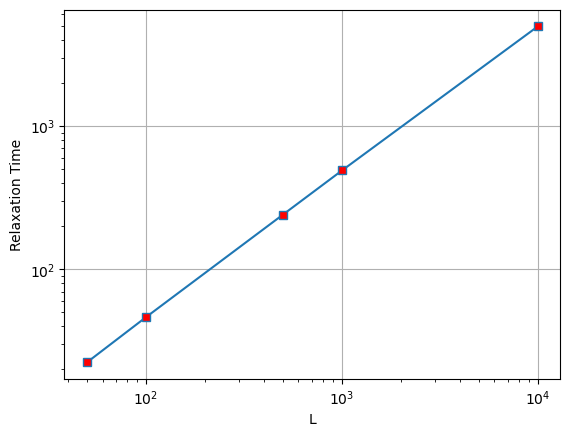

slope = 1.0184679321626278$\pm$0.0039941098787540244


In [14]:
#We obsevere a powerlaw emerges, but we are constrained by finite system size

#Let us do analysis for the finite size scaling

#We now look at the value at rho_c

plt.loglog(N_array, relaxation_times[:, int((len(rho_array)-1)/2)], marker='s', mfc = 'red')
plt.xlabel('L')
plt.ylabel('Relaxation Time')
#plt.title('Relaxation Time vs Density for different N values')
plt.grid(True)
plt.show()

from scipy.stats import linregress
x = np.log10(N_array)
y = np.log10(relaxation_times[:, int((len(rho_array)-1)/2)])
result = linregress(x, y)

slope = result.slope
std_err = result.stderr
#print(dir(result)) #to view attributes of an object in python
print('slope = '+str(slope)+'$\pm$' +str(std_err))


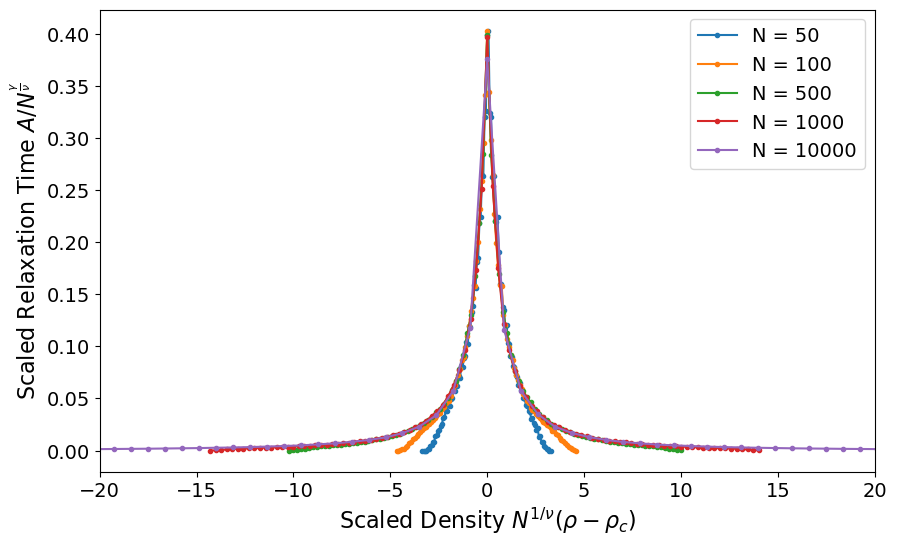

In [13]:
#fancy code for paper - 

# Finite size scaling collapse

def transform_fss_data(relaxation_times, N_array, rho_array, rho_c, nu, z):
    """
    Transform the relaxation times and densities according to finite size scaling hypothesis.

    Parameters:
    relaxation_times (2D array): Array of relaxation times with shape (len(N_array), len(rho_array)).
    N_array (list or array): Array of system sizes.
    rho_array (list or array): Array of densities.
    rho_c (float): Critical density.
    nu (float): Correlation length exponent.
    z (float): Dynamic critical exponent.

    Returns:
    scaled_rho (1D array): Scaled densities.
    scaled_relaxation_time (1D array): Scaled relaxation times.
    """
    scaled_rho = []
    scaled_relaxation_times = []

    for i, N in enumerate(N_array):
        for j, rho in enumerate(rho_array):
            scaled_rho.append(N**(1/nu) * (rho - rho_c))
            scaled_relaxation_times.append(relaxation_times[i, j] / N**z)

    return np.array(scaled_rho), np.array(scaled_relaxation_times)

# Example usage of finite size scaling function
#----------------------------------------------------------------

rho_c = 0.5  # Critical density
nu = 2.06  # Example value for correlation length exponent (to be optimized)
z = 1.03   # Example value for dynamic critical exponent (to be optimized)

scaled_rho, scaled_relaxation_times = transform_fss_data(relaxation_times, N_array, rho_array, rho_c, nu, z)

# Plot the transformed data
plt.figure(figsize=(10, 6))

for l in range(len(N_array)):
    plt.plot(
        scaled_rho[l * len(rho_array):(l + 1) * len(rho_array) - 1],
        scaled_relaxation_times[l * len(rho_array):(l + 1) * len(rho_array) - 1],
        linestyle='-', marker='.', label=f'N = {N_array[l]}'
    )

# Customizing the plot
plt.xlabel(r'Scaled Density $N^{1/\nu} (\rho - \rho_c)$', fontsize=16)  # Larger font for x-axis label
plt.ylabel(r'Scaled Relaxation Time $A/ N^{\frac{\gamma}{\nu}}$', fontsize=16)  # Larger font for y-axis label
plt.xticks(fontsize=14)  # Bigger font for x-axis ticks
plt.yticks(fontsize=14)  # Bigger font for y-axis ticks
plt.xlim(-20, 20)  # Set x-axis limits
plt.legend(fontsize=14, frameon=True)  # Bigger font for legend and keep legend box
plt.show()  # No grid (default behavior)


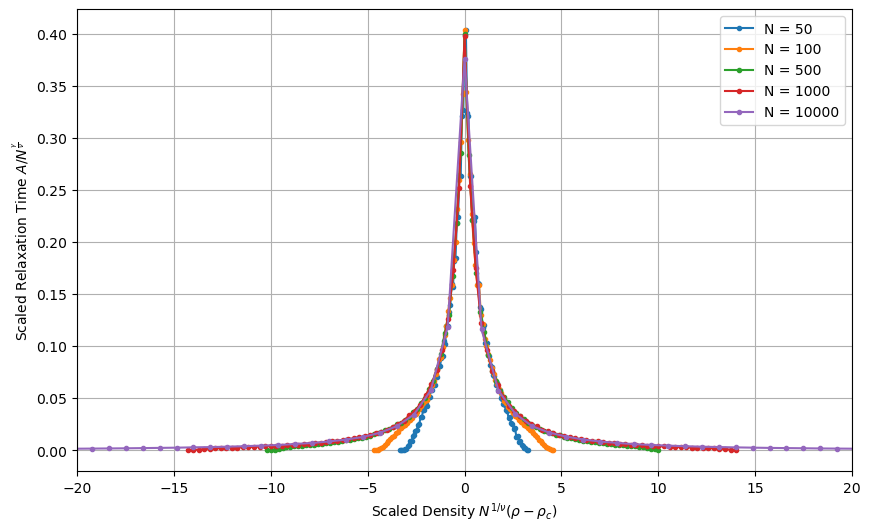

In [12]:
#finite size scaling collapse - 

def transform_fss_data(relaxation_times, N_array, rho_array, rho_c, nu, z):
    """
    Transform the relaxation times and densities according to finite size scaling hypothesis.

    Parameters:
    relaxation_times (2D array): Array of relaxation times with shape (len(N_array), len(rho_array)).
    N_array (list or array): Array of system sizes.
    rho_array (list or array): Array of densities.
    rho_c (float): Critical density.
    nu (float): Correlation length exponent.
    z (float): Dynamic critical exponent.

    Returns:
    scaled_rho (1D array): Scaled densities.
    scaled_relaxation_time (1D array): Scaled relaxation times.
    """
    scaled_rho = []
    scaled_relaxation_times = []

    for i, N in enumerate(N_array):
        for j, rho in enumerate(rho_array):
            scaled_rho.append(N**(1/nu) * (rho - rho_c))
            scaled_relaxation_times.append(relaxation_times[i, j] / N**z)

    return np.array(scaled_rho), np.array(scaled_relaxation_times)

# Example usage of finite size scaling function
#----------------------------------------------------------------

rho_c = 0.5  # Critical density
nu = 2.06  # Example value for correlation length exponent (to be optimized)
z = 1.03   # Example value for dynamic critical exponent (to be optimized) z = gamma/nu

scaled_rho, scaled_relaxation_times = transform_fss_data(relaxation_times, N_array, rho_array, rho_c, nu, z)

# Plot the transformed data
plt.figure(figsize=(10, 6))

for l in range(len(N_array)):
    plt.plot(scaled_rho[l*len(rho_array):(l+1)*len(rho_array) - 1], scaled_relaxation_times[l*len(rho_array):(l+1)*len(rho_array) - 1] , linestyle = '-', marker = '.', label=f'N = {N_array[l]}')
plt.xlabel(r'Scaled Density $N^{1/\nu} (\rho - \rho_c)$')
plt.ylabel(r'Scaled Relaxation Time $A/ N^{\frac{\gamma}{\nu}}$')
plt.xlim(-20,20)
#plt.title('Finite Size Scaling Transformed Data')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
#adding data for new system sizes to existing data files- 

import pandas as pd
import numpy as np

#______________________________Do simulations for parts you did not do before to add to the existing data
#generate new N list
#generate new rho list
#generate new relaxation time list
#______________________________

# New data to be added
new_N_list = [new_N_value_1, new_N_value_2]  # Replace with new system size values
new_rho_list = [new_rho_value_1, new_rho_value_2]  # Replace with new density values
new_relaxn_time_list = [new_time_1, new_time_2]  # Replace with new relaxation times

# Step 1: Load the existing data from the Excel file
existing_df = pd.read_excel('relaxation_time_data.xlsx')

# Step 2: Create a new DataFrame for the new data
new_data = {
    'Relax_time': new_relaxn_time_list,
    'N': new_N_list,
    'Density': new_rho_list
}
new_df = pd.DataFrame(new_data)

# Step 3: Append the new data to the existing data
updated_df = pd.concat([existing_df, new_df], ignore_index=True)

# Step 4: Save the updated DataFrame back to the Excel file
updated_df.to_excel('relaxation_time_data.xlsx', index=False)

print('New data added and saved to relaxation_time_data.xlsx')